In [226]:
import pandas as pd
import numpy as np
%matplotlib inline

In [227]:
zhviData=pd.read_csv('Neighborhood_Zhvi_AllHomes.csv')

In [228]:
zhviData.set_index('RegionID',inplace=True)
zhviData.head()


RegionName         City State  \
RegionID                                         
274772     Northeast Dallas       Dallas    TX   
192689             Paradise    Las Vegas    NV   
112345             Maryvale      Phoenix    AZ   
27080          Sherman Oaks  Los Angeles    CA   
118208    South Los Angeles  Los Angeles    CA   

                                   Metro   CountyName  SizeRank   1996-04  \
RegionID                                                                    
274772                 Dallas-Fort Worth       Dallas         1       NaN   
192689                         Las Vegas        Clark         2  115400.0   
112345                           Phoenix     Maricopa         3   58900.0   
27080     Los Angeles-Long Beach-Anaheim  Los Angeles         4  216200.0   
118208    Los Angeles-Long Beach-Anaheim  Los Angeles         5  117600.0   

           1996-05   1996-06   1996-07   ...      2016-05  2016-06  2016-07  \
RegionID                                 ...                                  
274772         NaN       NaN       NaN   ...     260600.0   265700   273600   
192689    115300.0  115500.0  115900.0   ...     184400.0   186400   189400   
112345     58900.0   58900.0   58800.0   ...     135100.0   137500   139800   
27080     218200.0  218900.0  218600.0   ...     833100.0   835400   838100   
118208    118700.0  119600.0  119900.0   ...     374200.0   378800   383700   

          2016-08  2016-09  2016-10  2016-11  2016-12  2017-01  2017-02  
RegionID                                                                 
274772     276900   276300   277500   277900   276900   277800   280300  
192689     191300   191900   192900   193900   195700   198100   200200  
112345     141500   143000   144600   146000   147300   148100   148300  
27080      843500   850900   860000   868100   873300   876500   879900  
118208     386400   388700   393500   398700   403300   407800   411600  

[5 rows x 257 columns]

In [229]:
#Create a new datafram zhiviregion info
# zhiviData.columns[:6]
zhviRegionInfo=zhviData.copy()[zhviData.columns[:6]]

In [230]:
zhviRegionInfo.head()

RegionName         City State  \
RegionID                                         
274772     Northeast Dallas       Dallas    TX   
192689             Paradise    Las Vegas    NV   
112345             Maryvale      Phoenix    AZ   
27080          Sherman Oaks  Los Angeles    CA   
118208    South Los Angeles  Los Angeles    CA   

                                   Metro   CountyName  SizeRank  
RegionID                                                         
274772                 Dallas-Fort Worth       Dallas         1  
192689                         Las Vegas        Clark         2  
112345                           Phoenix     Maricopa         3  
27080     Los Angeles-Long Beach-Anaheim  Los Angeles         4  
118208    Los Angeles-Long Beach-Anaheim  Los Angeles         5

In [231]:
# # Abhijit's Method- Store values as coulmn names
# import time
# import pandas as pd
# import numpy as np

# start_time = time.time()

# zhviData = pd.read_csv('http://files.zillowstatic.com/research/public/Neighborhood/Neighborhood_Zhvi_AllHomes.csv')
# dictofdataframes = {}
# for regionid in zhviData.index:
#     dictofdataframes['region' + str(regionid)] = pd.DataFrame({
#         'RegionID': regionid,
#         'RegionName': zhviData.loc[regionid, 'RegionName'],
#         'City': zhviData.loc[regionid, 'City'],
#         'State': zhviData.loc[regionid, 'State'],
#         'Metro': zhviData.loc[regionid, 'Metro'],
#         'CountyName': zhviData.loc[regionid, 'CountyName'],
#         'SizeRank': zhviData.loc[regionid, 'SizeRank'],
#         'Price': zhviData.loc[regionid].values[7:],
#     }, index=zhviData.loc[regionid].index.values[7:])

# zhviData2 = pd.DataFrame()

# for key, value in dictofdataframes.items():
#     zhviData2 = zhviData2.append(value)
#     if len(zhviData2) > 1000000:
#         break
# endtime = time.time()
# tot_time = endtime - start_time
# print 'Total Runtime in seconds', tot_time
# print 'Total Runtime in minutes', tot_time / 60

In [232]:
#Run cell 2 first to set index
zhviTimeSeriesData=zhviData.copy()[zhviData.columns[7:]].T


In [233]:
zhviTimeSeriesData.plot(legend=False)

In [234]:
zhviTimeSeriesData.isnull().sum().sum()

140494

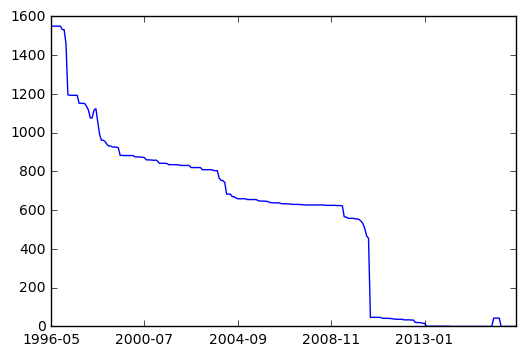

In [235]:
# Check Null Values
zhviData[zhviData.columns[7:]].isnull().sum().plot()

In [236]:
#Select Region 192689 for Analysis
selectedRegionTimeSeries=zhviTimeSeriesData.loc[:,192689]
selectedRegionTimeSeries.isnull().sum()
selectedRegionTimeSeries.plot()


In [237]:
#Select rows with the county Clark in the same region
selectedStateInfo=zhviRegionInfo[zhviRegionInfo['State']=='NV']
selectedMetroInfo=selectedStateInfo[selectedStateInfo.Metro=='Las Vegas']
selectedCountyInfo=selectedMetroInfo[selectedMetroInfo.CountyName=='Clark']
selectedCityInfo=selectedCountyInfo[selectedCountyInfo.City=='Las Vegas']
selectedCityInfo

RegionName       City State      Metro CountyName  SizeRank
RegionID                                                                     
192689              Paradise  Las Vegas    NV  Las Vegas      Clark         2
192820         Sunrise Manor  Las Vegas    NV  Las Vegas      Clark         7
192796         Spring Valley  Las Vegas    NV  Las Vegas      Clark         9
35521             Enterprise  Las Vegas    NV  Las Vegas      Clark        29
273177      Centennial Hills  Las Vegas    NV  Las Vegas      Clark       121
274346         Lone Mountain  Las Vegas    NV  Las Vegas      Clark       124
275609       Summerlin North  Las Vegas    NV  Las Vegas      Clark       131
274510           Michael Way  Las Vegas    NV  Las Vegas      Clark       142
274697        North Cheyenne  Las Vegas    NV  Las Vegas      Clark       225
276253    Charleston Heights  Las Vegas    NV  Las Vegas      Clark       226
276525     Rancho Charleston  Las Vegas    NV  Las Vegas      Clark       234
192889               Whitney  Las Vegas    NV  Las Vegas      Clark       250
396209       Summerlin South  Las Vegas    NV  Las Vegas      Clark       272
270764             The Lakes  Las Vegas    NV  Las Vegas      Clark       322
276649        West Las Vegas  Las Vegas    NV  Las Vegas      Clark       474
275354        Sheep Mountain  Las Vegas    NV  Las Vegas      Clark       493
275782          Tule Springs  Las Vegas    NV  Las Vegas      Clark       520
270622         Desert Shores  Las Vegas    NV  Las Vegas      Clark       593
273086               Buffalo  Las Vegas    NV  Las Vegas      Clark       636
274073             Huntridge  Las Vegas    NV  Las Vegas      Clark       705
275041          Pioneer Park  Las Vegas    NV  Las Vegas      Clark       731
274207           Kyle Canyon  Las Vegas    NV  Las Vegas      Clark       848
272770    Angel Park Lindell  Las Vegas    NV  Las Vegas      Clark       874
275613    Sun City Summerlin  Las Vegas    NV  Las Vegas      Clark       927
275787            Twin Lakes  Las Vegas    NV  Las Vegas      Clark      1145
275797                   UMC  Las Vegas    NV  Las Vegas      Clark      3052

In [238]:
#Create a function (use capital for function name) by passing region id and return the above info variables
def GetInfo(region_id):
    selectedRegionInfo=zhviRegionInfo.loc[region_id]
    selectedStateInfo=zhviRegionInfo[zhviRegionInfo['State']==selectedRegionInfo['State']]
    selectedMetroInfo=selectedStateInfo[selectedStateInfo.Metro==selectedRegionInfo['Metro']]
    selectedCountyInfo=selectedMetroInfo[selectedMetroInfo.CountyName==selectedRegionInfo['CountyName']]
    selectedCityInfo=selectedCountyInfo[selectedCountyInfo.City==selectedRegionInfo['City']]
    return selectedStateInfo,selectedMetroInfo,selectedCountyInfo,selectedCityInfo,selectedRegionInfo
    


In [239]:
GetInfo(192689)

(                               RegionName       City State      Metro  \
 RegionID                                                                
 192689                           Paradise  Las Vegas    NV  Las Vegas   
 192820                      Sunrise Manor  Las Vegas    NV  Las Vegas   
 192796                      Spring Valley  Las Vegas    NV  Las Vegas   
 35521                          Enterprise  Las Vegas    NV  Las Vegas   
 273177                   Centennial Hills  Las Vegas    NV  Las Vegas   
 274346                      Lone Mountain  Las Vegas    NV  Las Vegas   
 275609                    Summerlin North  Las Vegas    NV  Las Vegas   
 274510                        Michael Way  Las Vegas    NV  Las Vegas   
 273887                 Green Valley North  Henderson    NV  Las Vegas   
 274697                     North Cheyenne  Las Vegas    NV  Las Vegas   
 276253                 Charleston Heights  Las Vegas    NV  Las Vegas   
 276311                          East 

In [240]:
def GetTimeSeries(region_id):
    dfs=GetInfo(region_id)
    return zhviTimeSeriesData[dfs[0].index.values],zhviTimeSeriesData[dfs[1].index.values],zhviTimeSeriesData[dfs[2].index.values],zhviTimeSeriesData[dfs[3].index.values],zhviTimeSeriesData[region_id]

for df in GetTimeSeries(192689):
    print df.head()

RegionID    192689   192820    192796    35521     273177    274346    275609  \
1996-05   115300.0  98300.0  124500.0  140600.0  135600.0  135800.0  171600.0   
1996-06   115500.0  98200.0  123500.0  139200.0  134600.0  134900.0  170000.0   
1996-07   115900.0  98000.0  122700.0  137600.0  133700.0  134300.0  168100.0   
1996-08   116200.0  97800.0  122300.0  136900.0  133400.0  134200.0  167000.0   
1996-09   116500.0  97600.0  122200.0  137100.0  133400.0  134200.0  166900.0   

RegionID   274510    273887    274697    ...       275970    272970    31792   \
1996-05   97000.0  137000.0  125000.0    ...     163400.0  114800.0  149900.0   
1996-06   97100.0  136100.0  124900.0    ...     159300.0  114600.0  150700.0   
1996-07   97100.0  135200.0  124900.0    ...     155900.0  114700.0  151900.0   
1996-08   97100.0  134600.0  125100.0    ...     156200.0  115000.0  152500.0   
1996-09   97200.0  134700.0  125400.0    ...     157000.0  115300.0  152800.0   

RegionID    57189     2737

In [241]:
#State - min,max,25%,50%,75%,etc
#for each time step
x=GetTimeSeries(192689)
def GetAggregate(region_id):
    selectedTimeSeries=GetTimeSeries(region_id)
    return [item.T.describe().T for item in selectedTimeSeries[:-1]]

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


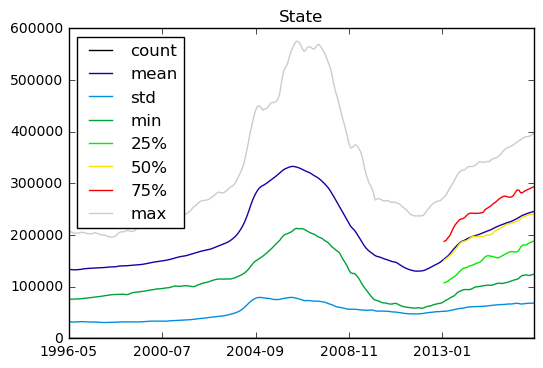

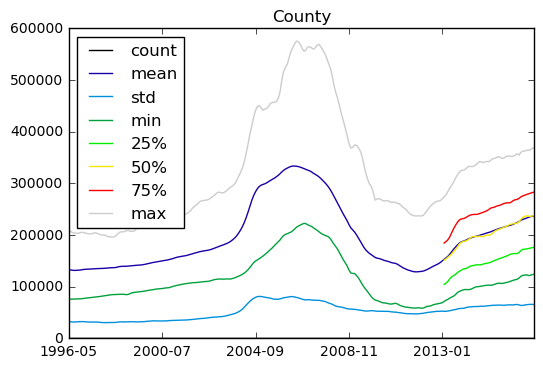

In [242]:
for x,y in zip(['State','Metro','County','City'],GetAggregate(192689)):
    print y.plot(colormap='spectral',title=x)

In [243]:
x=GetAggregate(192689)
x[0]['mean']

1996-05    133750.000000
1996-06    133369.642857
1996-07    132910.714286
1996-08    132737.500000
1996-09    132921.428571
1996-10    133083.928571
1996-11    133451.785714
1996-12    134101.785714
1997-01    134719.642857
1997-02    135144.642857
1997-03    135455.357143
1997-04    135607.142857
1997-05    135796.428571
1997-06    136067.857143
1997-07    136333.928571
1997-08    136548.214286
1997-09    136716.071429
1997-10    136894.642857
1997-11    137060.714286
1997-12    137253.571429
1998-01    137662.500000
1998-02    138107.142857
1998-03    138341.071429
1998-04    138433.928571
1998-05    138453.571429
1998-06    138712.500000
1998-07    139430.357143
1998-08    140119.642857
1998-09    140453.571429
1998-10    140576.785714
               ...      
2014-09    201807.017544
2014-10    203382.456140
2014-11    204752.631579
2014-12    206352.631579
2015-01    207750.877193
2015-02    208970.175439
2015-03    210443.859649
2015-04    212336.842105
2015-05    214136.842105


In [244]:
# Form a data frame from the means so we can plot them together
def GetAggregatedSeries(region_id):
    x=GetAggregate(region_id)
    df=pd.DataFrame(data={
            'Region':zhviTimeSeriesData[region_id],
            'State':x[0]['mean'],
            'Metro':x[1]['mean'],
            'County':x[2]['mean'],
            'City':x[3]['mean']
        },index=zhviTimeSeriesData.index
    )
    return df


In [245]:
zhviTimeSeriesData.head(100)

RegionID    274772    192689    112345    27080     118208  270957    192820  \
1996-05        NaN  115300.0   58900.0  218200.0  118700.0     NaN   98300.0   
1996-06        NaN  115500.0   58900.0  218900.0  119600.0     NaN   98200.0   
1996-07        NaN  115900.0   58800.0  218600.0  119900.0     NaN   98000.0   
1996-08        NaN  116200.0   58800.0  218900.0  119800.0     NaN   97800.0   
1996-09        NaN  116500.0   58800.0  219800.0  119700.0     NaN   97600.0   
1996-10        NaN  116400.0   59000.0  220100.0  119500.0     NaN   97700.0   
1996-11        NaN  116500.0   59200.0  220100.0  119600.0     NaN   97900.0   
1996-12        NaN  117100.0   59300.0  221600.0  119700.0     NaN   98300.0   
1997-01        NaN  117500.0   59500.0  224100.0  120300.0     NaN   98900.0   
1997-02    89000.0  117800.0   59800.0  227300.0  121000.0     NaN   99600.0   
1997-03    89200.0  118200.0   60100.0  229300.0  121400.0     NaN   99800.0   
1997-04    89300.0  118400.0   60300.0  229300.0  121300.0     NaN  100000.0   
1997-05    89500.0  118400.0   60400.0  228200.0  121400.0     NaN  100500.0   
1997-06    89900.0  118400.0   60600.0  227600.0  121900.0     NaN  101000.0   
1997-07    90400.0  118500.0   61100.0  228500.0  122500.0     NaN  101400.0   
1997-08    91000.0  118500.0   61500.0  230100.0  123300.0     NaN  101700.0   
1997-09    91400.0  118700.0   62100.0  231200.0  123900.0     NaN  101800.0   
1997-10    91900.0  119000.0   62600.0  232700.0  124600.0     NaN  101900.0   
1997-11    92300.0  119600.0   63200.0  235400.0  125200.0     NaN  102200.0   
1997-12    92600.0  119800.0   63700.0  238100.0  125900.0     NaN  102500.0   
1998-01    92900.0  120100.0   64100.0  240700.0  127000.0     NaN  103000.0   
1998-02    93100.0  120600.0   64500.0  244100.0  128200.0     NaN  103500.0   
1998-03    93600.0  121000.0   64900.0  249200.0  128800.0     NaN  103900.0   
1998-04    94200.0  121300.0   65300.0  254800.0  129200.0     NaN  104000.0   
1998-05    94700.0  121300.0   66100.0  259600.0  129600.0     NaN  104100.0   
1998-06    95300.0  121800.0   67100.0  263400.0  129600.0     NaN  104500.0   
1998-07    96100.0  122400.0   67900.0  267600.0  129500.0     NaN  104900.0   
1998-08    96800.0  122500.0   68100.0  271400.0  129700.0     NaN  105300.0   
1998-09    97500.0  122400.0   68100.0  276000.0  130300.0     NaN  105700.0   
1998-10    98300.0  122600.0   68200.0  280000.0  130900.0     NaN  106000.0   
...            ...       ...       ...       ...       ...     ...       ...   
2002-03   135100.0  144500.0   93900.0  386000.0  159500.0     NaN  129100.0   
2002-04   135400.0  145000.0   94200.0  390400.0  161200.0     NaN  129700.0   
2002-05   135900.0  145400.0   94600.0  397400.0  162700.0     NaN  130000.0   
2002-06   136700.0  145700.0   95000.0  405400.0  163800.0     NaN  130200.0   
2002-07   137600.0  145800.0   95500.0  414400.0  164900.0     NaN  130200.0   
2002-08   138200.0  146100.0   96100.0  424300.0  166000.0     NaN  130300.0   
2002-09   138700.0  146900.0   96700.0  432400.0  167700.0     NaN  130500.0   
2002-10   139400.0  148200.0   97200.0  436900.0  170000.0     NaN  131000.0   
2002-11   140600.0  149600.0   97900.0  439500.0  172500.0     NaN  132000.0   
2002-12   142000.0  151200.0   98700.0  443100.0  175200.0     NaN  133100.0   
2003-01   143400.0  152800.0   99500.0  448100.0  178200.0     NaN  134000.0   
2003-02   144700.0  154100.0   99900.0  454800.0  181200.0     NaN  134800.0   
2003-03   145300.0  155300.0  100300.0  462800.0  184500.0     NaN  135800.0   
2003-04   145400.0  156300.0  100800.0  471200.0  188300.0     NaN  136700.0   
2003-05   145500.0  156900.0  101100.0  477000.0  191600.0     NaN  137500.0   
2003-06   145500.0  157700.0  101500.0  482300.0  193900.0     NaN  138100.0   
2003-07   145300.0  159000.0  101900.0  489500.0  196200.0     NaN  138800.0   
2003-08   145500.0  160900.0  102100.0  498200.0  199400.0     NaN  140000.0   


In [246]:
aggregatedTimeSeries=GetAggregatedSeries(192689)
aggregatedTimeSeries.head()
aggregatedTimeSeries.plot(colormap='spectral')

In [357]:
# def GenerateLagColumns(data=aggregatedTimeSeries,lags=[1,2]):
#     for column_number in range(5):
#         for lagvalue in lags:
#             data[str(data.columns[column_number])+'_'+str(lagvalue)]=data.iloc[:,column_number].shift(periods=lagvalue)
#     return data

In [358]:
def GenerateLagColumns(data=aggregatedTimeSeries,lags=[1,2]):
    noofcols=len(data.columns)
    for column_number in range(noofcols):
        for lagvalue in lags:
            data[str(data.columns[column_number])+'_'+str(lagvalue)]=data.iloc[:,column_number].shift(periods=lagvalue)
    return data

In [360]:
GenerateLagColumns(data=GetAggregatedSeries(192689),lags=[1,2]).head()

City         County          Metro    Region          State  \
1996-05  126096.153846  132934.782609  132934.782609  115300.0  133750.000000   
1996-06  125626.923077  132452.173913  132452.173913  115500.0  133369.642857   
1996-07  125123.076923  131858.695652  131858.695652  115900.0  132910.714286   
1996-08  124896.153846  131615.217391  131615.217391  116200.0  132737.500000   
1996-09  125011.538462  131813.043478  131813.043478  116500.0  132921.428571   

                City_1         City_2       County_1       County_2  \
1996-05            NaN            NaN            NaN            NaN   
1996-06  126096.153846            NaN  132934.782609            NaN   
1996-07  125626.923077  126096.153846  132452.173913  132934.782609   
1996-08  125123.076923  125626.923077  131858.695652  132452.173913   
1996-09  124896.153846  125123.076923  131615.217391  131858.695652   

               Metro_1        Metro_2  Region_1  Region_2        State_1  \
1996-05            NaN            NaN       NaN       NaN            NaN   
1996-06  132934.782609            NaN  115300.0       NaN  133750.000000   
1996-07  132452.173913  132934.782609  115500.0  115300.0  133369.642857   
1996-08  131858.695652  132452.173913  115900.0  115500.0  132910.714286   
1996-09  131615.217391  131858.695652  116200.0  115900.0  132737.500000   

               State_2  
1996-05            NaN  
1996-06            NaN  
1996-07  133750.000000  
1996-08  133369.642857  
1996-09  132910.714286

In [250]:
# Return is the measure of success - What percentage of increase happened - like stock market daily return
# Naming convention for column - Return_<city>_<duration>

In [251]:
lagdata=GenerateLagColumns(data=GetAggregatedSeries(192689),lags=range(1,8))
lagdata['return_1']=(lagdata['City']/lagdata['City_5'])-1

In [252]:
lagdata.head()

City         County          Metro    Region          State  \
1996-05  126096.153846  132934.782609  132934.782609  115300.0  133750.000000   
1996-06  125626.923077  132452.173913  132452.173913  115500.0  133369.642857   
1996-07  125123.076923  131858.695652  131858.695652  115900.0  132910.714286   
1996-08  124896.153846  131615.217391  131615.217391  116200.0  132737.500000   
1996-09  125011.538462  131813.043478  131813.043478  116500.0  132921.428571   

                City_1         City_2         City_3         City_4  City_5  \
1996-05            NaN            NaN            NaN            NaN     NaN   
1996-06  126096.153846            NaN            NaN            NaN     NaN   
1996-07  125626.923077  126096.153846            NaN            NaN     NaN   
1996-08  125123.076923  125626.923077  126096.153846            NaN     NaN   
1996-09  124896.153846  125123.076923  125626.923077  126096.153846     NaN   

           ...     Region_6  Region_7        State_1        State_2  \
1996-05    ...          NaN       NaN            NaN            NaN   
1996-06    ...          NaN       NaN  133750.000000            NaN   
1996-07    ...          NaN       NaN  133369.642857  133750.000000   
1996-08    ...          NaN       NaN  132910.714286  133369.642857   
1996-09    ...          NaN       NaN  132737.500000  132910.714286   

               State_3   State_4  State_5  State_6  State_7  return_1  
1996-05            NaN       NaN      NaN      NaN      NaN       NaN  
1996-06            NaN       NaN      NaN      NaN      NaN       NaN  
1996-07            NaN       NaN      NaN      NaN      NaN       NaN  
1996-08  133750.000000       NaN      NaN      NaN      NaN       NaN  
1996-09  133369.642857  133750.0      NaN      NaN      NaN       NaN  

[5 rows x 41 columns]

In [253]:
def GetReturnValue(data,returnDurations=[1,2]):
    totalcolumns=len(data.columns)
    for r in returnDurations:
        for column in data.columns[0:totalcolumns]:
            data[str('Return') + str(column) + str(r)]=data[column]/data[column].shift(periods=r) -1
    return data

In [254]:
GetReturnValue(GetAggregatedSeries(192689),returnDurations=[2]).head()

City         County          Metro    Region          State  \
1996-05  126096.153846  132934.782609  132934.782609  115300.0  133750.000000   
1996-06  125626.923077  132452.173913  132452.173913  115500.0  133369.642857   
1996-07  125123.076923  131858.695652  131858.695652  115900.0  132910.714286   
1996-08  124896.153846  131615.217391  131615.217391  116200.0  132737.500000   
1996-09  125011.538462  131813.043478  131813.043478  116500.0  132921.428571   

         ReturnCity2  ReturnCounty2  ReturnMetro2  ReturnRegion2  ReturnState2  
1996-05          NaN            NaN           NaN            NaN           NaN  
1996-06          NaN            NaN           NaN            NaN           NaN  
1996-07    -0.007717      -0.008095     -0.008095       0.005204     -0.006275  
1996-08    -0.005817      -0.006319     -0.006319       0.006061     -0.004740  
1996-09    -0.000891      -0.000346     -0.000346       0.005177      0.000081

In [255]:
#Pandas has a built in utility similar to above
aggregatedTimeSeries=GetAggregatedSeries(192689)
aggregatedTimeSeries[['City','County','Metro','Region','State']].pct_change(2).head()

City    County     Metro    Region     State
1996-05       NaN       NaN       NaN       NaN       NaN
1996-06       NaN       NaN       NaN       NaN       NaN
1996-07 -0.007717 -0.008095 -0.008095  0.005204 -0.006275
1996-08 -0.005817 -0.006319 -0.006319  0.006061 -0.004740
1996-09 -0.000891 -0.000346 -0.000346  0.005177  0.000081

In [256]:
#Rewrite above function using pct-change
def GetReturnValue_pctchange(data,returnDurations=[1,2]):
    newdata=data.copy()
    
    for r in returnDurations:
        data_wreturn=newdata.pct_change(r)
        data_wreturn.columns=['Return'+str(column)+'_'+str(r) for column in newdata.columns]
        data=data.join(data_wreturn)
    return data

In [257]:
# GetAggregatedSeries(192689).pct_change(1)

In [258]:
GetReturnValue_pctchange(GetAggregatedSeries(192689),[2]).head()

City         County          Metro    Region          State  \
1996-05  126096.153846  132934.782609  132934.782609  115300.0  133750.000000   
1996-06  125626.923077  132452.173913  132452.173913  115500.0  133369.642857   
1996-07  125123.076923  131858.695652  131858.695652  115900.0  132910.714286   
1996-08  124896.153846  131615.217391  131615.217391  116200.0  132737.500000   
1996-09  125011.538462  131813.043478  131813.043478  116500.0  132921.428571   

         ReturnCity_2  ReturnCounty_2  ReturnMetro_2  ReturnRegion_2  \
1996-05           NaN             NaN            NaN             NaN   
1996-06           NaN             NaN            NaN             NaN   
1996-07     -0.007717       -0.008095      -0.008095        0.005204   
1996-08     -0.005817       -0.006319      -0.006319        0.006061   
1996-09     -0.000891       -0.000346      -0.000346        0.005177   

         ReturnState_2  
1996-05            NaN  
1996-06            NaN  
1996-07      -0.006275  
1996-08      -0.004740  
1996-09       0.000081

In [259]:
#This is same as above, except we are performing the 1-day  percentage return  on 1000 rows and only on Region and State 
lagReturnTimeSeries=GetReturnValue_pctchange(GetAggregatedSeries(274772).iloc[:,[3,4]],[1])
lagReturnTimeSeries.head()

Region         State  ReturnRegion_1  ReturnState_1
1996-05     NaN  69661.538462             NaN            NaN
1996-06     NaN  69550.000000             NaN      -0.001601
1996-07     NaN  69463.461538             NaN      -0.001244
1996-08     NaN  69434.615385             NaN      -0.000415
1996-09     NaN  69582.692308             NaN       0.002133

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5fb6b8af90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5fb60c1c10>]], dtype=object)

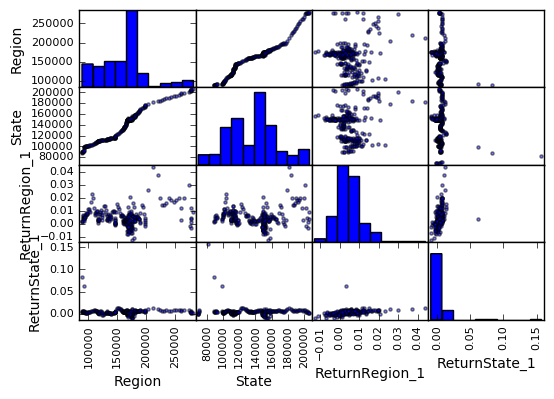

In [260]:
pd.tools.plotting.scatter_matrix(lagReturnTimeSeries)

In [261]:
#Seasonality
# To check seasonality we will draw a trendline and then subtract values

In [262]:
#To draw trendine we will have to use linear regression

In [263]:
from scipy import stats

In [264]:
aggregatedTimeSeries=GetAggregatedSeries(192689)
stats.linregress(aggregatedTimeSeries.index,aggregatedTimeSeries.Region)
# Above doesnt work because x axis needs to be an integer and index is 
# currrently a string 

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [265]:
print type(aggregatedTimeSeries.index[0]),aggregatedTimeSeries.index[0]


<type 'str'> 1996-05


In [266]:
#Convert index from string to integer
import datetime
import time

In [267]:
datetime.datetime.strptime(aggregatedTimeSeries.index[0],'%Y-%m')

datetime.datetime(1996, 5, 1, 0, 0)

In [268]:
#convert to tuple
datetime.datetime.strptime(aggregatedTimeSeries.index[0],'%Y-%m').timetuple()

time.struct_time(tm_year=1996, tm_mon=5, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=2, tm_yday=122, tm_isdst=-1)

In [269]:
#feed to convert it into seconds from 
# epoch of time jan 1 1970 -total seconds since then
time.mktime(datetime.datetime.strptime(aggregatedTimeSeries.index[0],'%Y-%m').timetuple())

830908800.0

In [270]:
#Now we will convert the entire index array to int array and feed to linregress
stats.linregress([time.mktime(datetime.datetime.strptime(timeVal,'%Y-%m').timetuple()) 
                  for timeVal in aggregatedTimeSeries.index],aggregatedTimeSeries.Region)


LinregressResult(slope=4.5556666072087461e-05, intercept=113054.29224879932, rvalue=0.15725914544931266, pvalue=0.012791074822084927, stderr=1.8166552453318639e-05)

##### Seasonality/Trend
##### Regression - Predict Value/Return
##### Classify - Buy/No Buy

In [271]:
lagReturnTimeSeries=GetReturnValue_pctchange(GetAggregatedSeries(118208).iloc[:,[3,4]],[1])
print lagReturnTimeSeries.head()
lagReturnTimeSeries.Region.plot()

           Region          State  ReturnRegion_1  ReturnState_1
1996-05  118700.0  202507.977208             NaN            NaN
1996-06  119600.0  202693.304843        0.007582       0.000915
1996-07  119900.0  202894.017094        0.002508       0.000990
1996-08  119800.0  203121.794872       -0.000834       0.001123
1996-09  119700.0  203431.054131       -0.000835       0.001523


In [272]:
#Convert Time to seconds since Epoch
timevalues=[time.mktime(datetime.datetime.strptime(value,'%Y-%m').timetuple()) for value in lagReturnTimeSeries.index]
# print timevalues

In [273]:
#Get Trend Values using linregress
# stats.linregress(timevalues,lagReturnTimeSeries.Region)
Trend=stats.linregress([time.mktime(datetime.datetime.strptime(value,'%Y-%m').timetuple()) for value in lagReturnTimeSeries.index],lagReturnTimeSeries.Region)

In [274]:
seasonalityDataFrame=pd.DataFrame({
        'Region':lagReturnTimeSeries.Region,
        'Time':timevalues
    })

In [275]:
seasonalityDataFrame['Trend']=seasonalityDataFrame.Time * Trend.slope + Trend.intercept

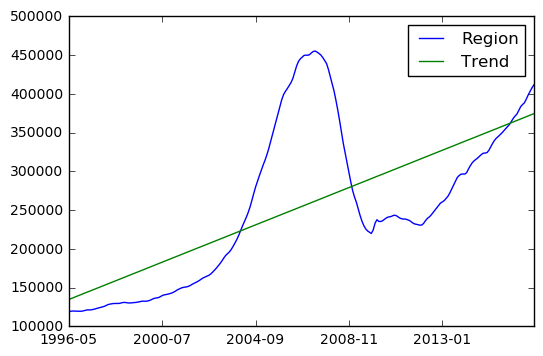

In [276]:
seasonalityDataFrame[['Region','Trend']].plot()

In [277]:
seasonalityDataFrame['seasonality']=seasonalityDataFrame.Trend - seasonalityDataFrame.Region

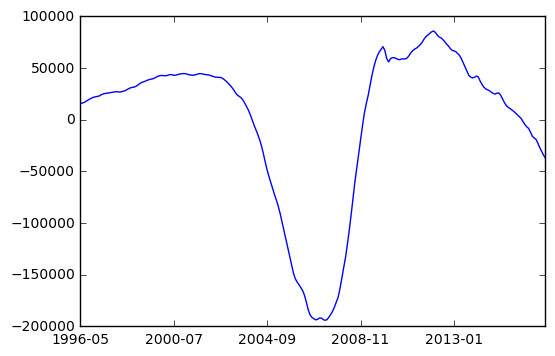

In [278]:
seasonalityDataFrame.seasonality.plot()

In [279]:
#Calclulate seasonality and trend sperately by dividing the dataset into 10 seperate parts
folds=10
size=int(len(seasonalityDataFrame.index)/folds)
starting_points=[i*size for i in range(folds)]
end_points=[j for j in starting_points[1:]] + [len(seasonalityDataFrame.index)]

seasonalityDataFrame['Trend_Fold_'+ str(folds)]=0
seasonalityDataFrame['Season_Fold_'+ str(folds)]=0

for start,end in zip(starting_points,end_points):
    data=seasonalityDataFrame[['Region','Time']][start:end]
    microTrend=stats.linregress(data.Time,data.Region)
    data['Trend_']=microTrend.intercept + microTrend.slope*data.Time
    data['Seasonality_']=data['Trend_'] - data.Region
    seasonalityDataFrame['Trend_Fold_'+ str(folds)].iloc[start:end,]=data['Trend_']
    seasonalityDataFrame['Season_Fold_'+ str(folds)].iloc[start:end,]=data['Seasonality_']
seasonalityDataFrame.head()


Region         Time          Trend   seasonality  Trend_Fold_10  \
1996-05  118700.0  830908800.0  134756.084170  16056.084170  117456.265040   
1996-06  119600.0  833587200.0  135736.503522  16136.503522  117915.853340   
1996-07  119900.0  836179200.0  136685.296444  16785.296444  118360.616211   
1996-08  119800.0  838857600.0  137665.715796  17865.715796  118820.204512   
1996-09  119700.0  841536000.0  138646.135149  18946.135149  119279.792812   

         Season_Fold_10  
1996-05    -1243.734960  
1996-06    -1684.146660  
1996-07    -1539.383789  
1996-08     -979.795488  
1996-09     -420.207188

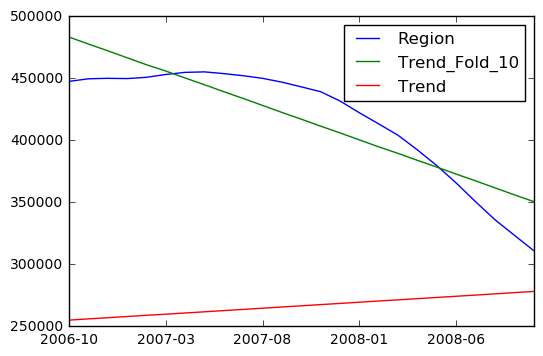

In [280]:
seasonalityDataFrame[['Region','Trend_Fold_10','Trend']].iloc[-125:-100,].plot()

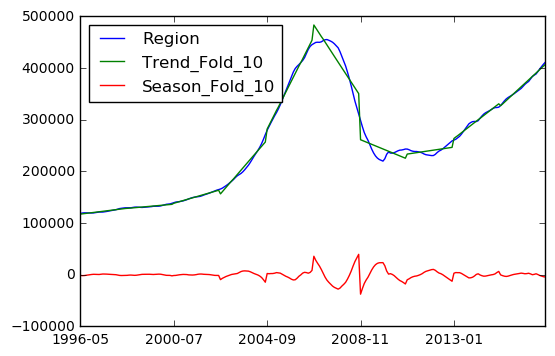

In [281]:
seasonalityDataFrame[['Region','Trend_Fold_10','Season_Fold_10']].plot()
# seasonalityDataFrame.head()

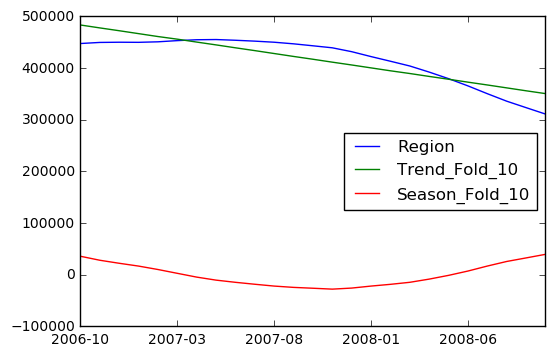

In [282]:
seasonalityDataFrame[['Region','Trend_Fold_10','Season_Fold_10']].iloc[125:150,].plot()

P- value in regression model means , what is the probability that the coefficient is zero for that variable.
If the probability is higher than >0.05, there is a good chance the coeff is zero which means that we can drop the variable 
from our analysis
Here the null hypothesis is that the coefficient is zero or that input variable x1, x2, ,,xn is not varying the output y


### Linear Modeling 

In [283]:
from sklearn import linear_model

In [284]:
#Input dataset
myReturnTimeSeries=GetReturnValue_pctchange(GetAggregatedSeries(274772),[1,2,3,6,9,12])
myReturnTimeSeries.head()
myLagData=GenerateLagColumns(data=GetAggregatedSeries(194430),lags=[1,2,3,6,9,12])
myData=myReturnTimeSeries.join(myLagData.iloc[:,5:])
myData.dropna(inplace=True)
myData.head()

City         County         Metro   Region          State  \
1998-02  94960.0  117283.333333  97559.782609  93100.0   99029.390681   
1998-03  95080.0  117166.666667  97881.521739  93600.0   99377.777778   
1998-04  95200.0  117083.333333  98132.608696  94200.0   99694.982079   
1998-05  95500.0  117205.555556  98256.521739  94700.0   99909.318996   
1998-06  96000.0  117338.888889  98346.739130  95300.0  100048.387097   

         ReturnCity_1  ReturnCounty_1  ReturnMetro_1  ReturnRegion_1  \
1998-02      0.002746        0.002993       0.004600        0.002153   
1998-03      0.001264       -0.000995       0.003298        0.005371   
1998-04      0.001262       -0.000711       0.002565        0.006410   
1998-05      0.003151        0.001044       0.001263        0.005308   
1998-06      0.005236        0.001138       0.000918        0.006336   

         ReturnState_1      ...        Region_3  Region_6  Region_9  \
1998-02       0.003516      ...        130400.0  127900.0  125400.0   
1998-03       0.003518      ...        130000.0  129000.0  125500.0   
1998-04       0.003192      ...        129500.0  129900.0  126700.0   
1998-05       0.002150      ...        129500.0  130400.0  127900.0   
1998-06       0.001392      ...        130200.0  130000.0  129000.0   

         Region_12        State_1        State_2        State_3  \
1998-02   129400.0  204882.142857  203448.214286  202459.821429   
1998-03   127500.0  206498.214286  204882.142857  203448.214286   
1998-04   126000.0  207829.464286  206498.214286  204882.142857   
1998-05   125400.0  210269.911504  207829.464286  206498.214286   
1998-06   125500.0  205050.000000  210269.911504  207829.464286   

               State_6        State_9       State_12  
1998-02  199833.035714  198841.071429  196901.785714  
1998-03  200726.785714  198922.321429  197973.214286  
1998-04  201591.964286  199209.821429  198640.178571  
1998-05  202459.821429  199833.035714  198841.071429  
1998-06  203448.214286  200726.785714  198922.321429  

[5 rows x 65 columns]

In [285]:
linmodel=linear_model.LinearRegression()
linmodel.fit(X=myData[['Region_1','Region_2','Region_6','State_1','State_2','State_6']],y=myData.Region)
# linmodel.fit(X=myData[['Region_1','Region_3','Region_6','Region_12','State_1','State_3','State_6','State_12']],y=myData.Region)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [286]:
#predictabove
mynewdata=pd.DataFrame({
        'predictedval':linmodel.predict(X=myData[['Region_1','Region_2','Region_6','State_1','State_2','State_6']]),
        'actualval':myData.Region
    })


In [287]:
mynewdata['Error']=mynewdata.actualval-mynewdata.predictedval

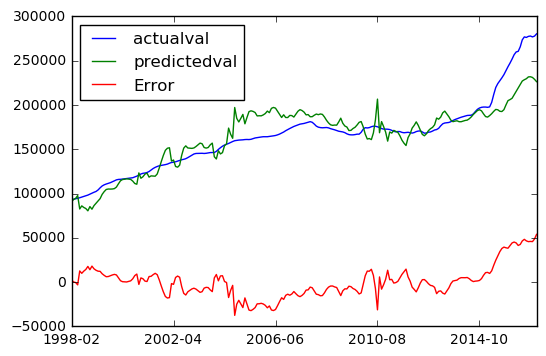

In [288]:
mynewdata.plot()

In [289]:
linmodel.score(
    X=myData[['Region_1','Region_2','Region_6','State_1','State_2','State_6']],
    y=myData.Region)

0.79653918926899558

In [290]:
mynewdata.head()

actualval  predictedval         Error
1998-02    93100.0  90686.876589   2413.123411
1998-03    93600.0  93387.580612    212.419388
1998-04    94200.0  94613.258350   -413.258350
1998-05    94700.0  97743.692950  -3043.692950
1998-06    95300.0  82643.950082  12656.049918

In [291]:
#Assignment
# Create 10 folds
# Fit Linear model for each fold
# Predict Values for all folds 1 at a time
# Visualize
mytimeseries=GetAggregatedSeries(274772)
myReturnTimeSeries=GetReturnValue_pctchange(mytimeseries,[1,2,3,6,9,12])
myReturnTimeSeries.head()
myLagData=GenerateLagColumns(data=GetAggregatedSeries(274772),lags=[1,2,3,6,9,12])
myData=myReturnTimeSeries.join(myLagData.iloc[:,5:])
myData.dropna(inplace=True)
myData.head()

City         County         Metro   Region          State  \
1998-02  94960.0  117283.333333  97559.782609  93100.0   99029.390681   
1998-03  95080.0  117166.666667  97881.521739  93600.0   99377.777778   
1998-04  95200.0  117083.333333  98132.608696  94200.0   99694.982079   
1998-05  95500.0  117205.555556  98256.521739  94700.0   99909.318996   
1998-06  96000.0  117338.888889  98346.739130  95300.0  100048.387097   

         ReturnCity_1  ReturnCounty_1  ReturnMetro_1  ReturnRegion_1  \
1998-02      0.002746        0.002993       0.004600        0.002153   
1998-03      0.001264       -0.000995       0.003298        0.005371   
1998-04      0.001262       -0.000711       0.002565        0.006410   
1998-05      0.003151        0.001044       0.001263        0.005308   
1998-06      0.005236        0.001138       0.000918        0.006336   

         ReturnState_1      ...       Region_3  Region_6  Region_9  Region_12  \
1998-02       0.003516      ...        92300.0   91000.0   89500.0    89000.0   
1998-03       0.003518      ...        92600.0   91400.0   89900.0    89200.0   
1998-04       0.003192      ...        92900.0   91900.0   90400.0    89300.0   
1998-05       0.002150      ...        93100.0   92300.0   91000.0    89500.0   
1998-06       0.001392      ...        93600.0   92600.0   91400.0    89900.0   

              State_1       State_2       State_3       State_6       State_9  \
1998-02  98682.437276  98172.043011  92442.045455  91136.363636  89852.091255   
1998-03  99029.390681  98682.437276  98172.043011  91620.075758  90179.847909   
1998-04  99377.777778  99029.390681  98682.437276  92028.409091  90595.057034   
1998-05  99694.982079  99377.777778  99029.390681  92442.045455  91136.363636   
1998-06  99909.318996  99694.982079  99377.777778  98172.043011  91620.075758   

             State_12  
1998-02  88586.259542  
1998-03  89065.779468  
1998-04  89470.342205  
1998-05  89852.091255  
1998-06  90179.847909  

[5 rows x 65 columns]

In [292]:
folds=10
size=len(myData)/folds
startid=[x*size for x in range(folds+1)]
endid=startid[1:] +[len(myData)]

In [293]:
scores=[]
newdf=pd.DataFrame()
for start,end in zip(startid,endid):
    df=myData.iloc[start:end,:]
    linmodel=linear_model.LinearRegression()
    linmodel.fit(X=df[['Region_1','Region_2','Region_6','State_1','State_2','State_6']],y=df[['Region']])
    scores.append(linmodel.score(X=df[['Region_1','Region_2','Region_6','State_1','State_2','State_6']],
                                 y=df[['Region']]))
    df.loc[:,'predictedval']=linmodel.predict(X=df[['Region_1','Region_2','Region_6','State_1','State_2','State_6']])
    newdf=newdf.append(df)

In [294]:
myData=myData.join(newdf[['predictedval']])
myData['actualval']=myData.Region
myData['error']=myData.actualval - myData.predictedval

In [295]:
myData.head()

City         County         Metro   Region          State  \
1998-02  94960.0  117283.333333  97559.782609  93100.0   99029.390681   
1998-03  95080.0  117166.666667  97881.521739  93600.0   99377.777778   
1998-04  95200.0  117083.333333  98132.608696  94200.0   99694.982079   
1998-05  95500.0  117205.555556  98256.521739  94700.0   99909.318996   
1998-06  96000.0  117338.888889  98346.739130  95300.0  100048.387097   

         ReturnCity_1  ReturnCounty_1  ReturnMetro_1  ReturnRegion_1  \
1998-02      0.002746        0.002993       0.004600        0.002153   
1998-03      0.001264       -0.000995       0.003298        0.005371   
1998-04      0.001262       -0.000711       0.002565        0.006410   
1998-05      0.003151        0.001044       0.001263        0.005308   
1998-06      0.005236        0.001138       0.000918        0.006336   

         ReturnState_1     ...      Region_12       State_1       State_2  \
1998-02       0.003516     ...        89000.0  98682.437276  98172.043011   
1998-03       0.003518     ...        89200.0  99029.390681  98682.437276   
1998-04       0.003192     ...        89300.0  99377.777778  99029.390681   
1998-05       0.002150     ...        89500.0  99694.982079  99377.777778   
1998-06       0.001392     ...        89900.0  99909.318996  99694.982079   

              State_3       State_6       State_9      State_12  predictedval  \
1998-02  92442.045455  91136.363636  89852.091255  88586.259542  93259.552623   
1998-03  98172.043011  91620.075758  90179.847909  89065.779468  93395.047819   
1998-04  98682.437276  92028.409091  90595.057034  89470.342205  94129.143673   
1998-05  99029.390681  92442.045455  91136.363636  89852.091255  94796.714959   
1998-06  99377.777778  98172.043011  91620.075758  90179.847909  95395.312549   

         actualval       error  
1998-02    93100.0 -159.552623  
1998-03    93600.0  204.952181  
1998-04    94200.0   70.856327  
1998-05    94700.0  -96.714959  
1998-06    95300.0  -95.312549  

[5 rows x 68 columns]

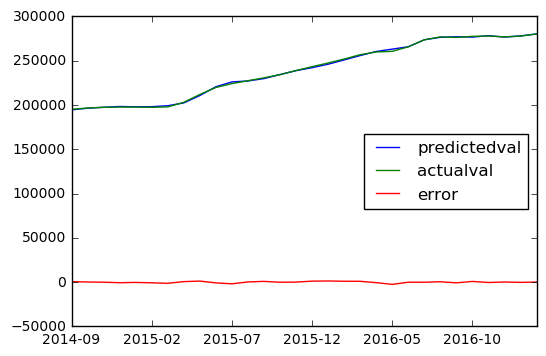

In [296]:
myData[['predictedval','actualval','error']].iloc[-30:,:].plot()

## ARIMA Modeling
Arima model has threee components -
AutoRegression - based on value p - If p is 5 the output is regressed against lag values of 1 - 5
Difference - based on value d -  1 means Present - Lag... of 2 means you take the difference 2 times
MovingAverage - based on value q- 3 means moving average based on 3 lag values
Above parameters are passed in the variable order=(p,d,q) when creating the ARIMA model

sm.tsa.ARMA() takes 2 arguments - data array and then the lag values that we want to pass in the form of a tuple
Note that index needs to be a date/time value

In [297]:
import statsmodels.api as sm

In [298]:
help(sm.tsa.ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |      endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional arry of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  
 |      Notes
 |      -----
 |      If exogenous variables are given, then the mo

In [299]:
aggregatedTimeSeries=GetAggregatedSeries(118208)
aggregatedTimeSeries.index=pd.to_datetime(aggregatedTimeSeries.index)
aggregatedTimeSeries.head(10)

City         County          Metro    Region  \
1996-05-01  202888.235294  216074.193548  220421.428571  118700.0   
1996-06-01  202725.000000  216076.774194  220481.632653  119600.0   
1996-07-01  202677.941176  216054.193548  220507.653061  119900.0   
1996-08-01  202895.588235  216025.161290  220535.714286  119800.0   
1996-09-01  203125.000000  216118.709677  220681.632653  119700.0   
1996-10-01  203213.235294  216310.967742  220924.489796  119500.0   
1996-11-01  203545.588235  216887.096774  221445.918367  119600.0   
1996-12-01  204410.294118  218059.354839  222460.714286  119700.0   
1997-01-01  205926.470588  219692.903226  223921.938776  120300.0   
1997-02-01  207594.117647  222499.363057  225941.206030  121000.0   

                    State  
1996-05-01  202507.977208  
1996-06-01  202693.304843  
1996-07-01  202894.017094  
1996-08-01  203121.794872  
1996-09-01  203431.054131  
1996-10-01  203919.230769  
1996-11-01  204683.475783  
1996-12-01  205873.931624  
1997-01-01  207515.811966  
1997-02-01  212894.829932

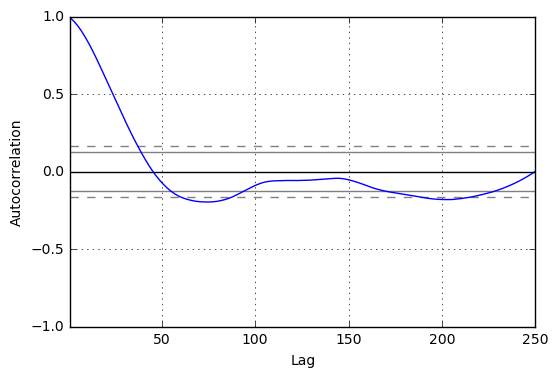

In [323]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(aggregatedTimeSeries[['Region']])

In [300]:
arimaModel=sm.tsa.ARIMA(endog=aggregatedTimeSeries[['Region']],order=(5,1,3))

In [301]:
arimaModelResults=arimaModel.fit(disp=0)

/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [457]:
arimaModelResults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Region   No. Observations:                  249
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -2030.983
Method:                       css-mle   S.D. of innovations            829.986
Date:                Fri, 21 Apr 2017   AIC                           4081.967
Time:                        23:12:02   BIC                           4117.141
Sample:                    06-01-1996   HQIC                          4096.125
                         - 02-01-2017                                         
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const           1075.5717    293.568      3.664      0.000       500.189  1650.954
ar.L1.D.Region     1.1043      0.070     15.852      0.000         0.968     1.241
ar.L2.D.Region     0.3034      0.118      2.570      0.011         0.072     0.535
ar.L3.D.Region    -0.2728      0.115     -2.364      0.019        -0.499    -0.047
ar.L4.D.Region     0.0930      0.114      0.815      0.416        -0.131     0.317
ar.L5.D.Region    -0.2354      0.067     -3.523      0.001        -0.366    -0.104
ma.L1.D.Region     0.5910      0.043     13.890      0.000         0.508     0.674
ma.L2.D.Region    -0.7354      0.032    -22.854      0.000        -0.798    -0.672
ma.L3.D.Region    -0.8557      0.039    -22.095      0.000        -0.932    -0.780
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0198           -0.0520j            1.0211           -0.0081
AR.2            1.0198           +0.0520j            1.0211            0.0081
AR.3           -1.3334           -0.0000j            1.3334           -0.5000
AR.4           -0.1555           -1.7410j            1.7479           -0.2642
AR.5           -0.1555           +1.7410j            1.7479            0.2642
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.9297           -0.5517j            1.0810           -0.4148
MA.3           -0.9297           +0.5517j            1.0810            0.4148
-----------------------------------------------------------------------------
"""

In [456]:
#alternatively
arimaModelResults.params

const             1075.571687
ar.L1.D.Region       1.104319
ar.L2.D.Region       0.303442
ar.L3.D.Region      -0.272776
ar.L4.D.Region       0.093029
ar.L5.D.Region      -0.235429
ma.L1.D.Region       0.591036
ma.L2.D.Region      -0.735352
ma.L3.D.Region      -0.855684
dtype: float64

In [ ]:
arimaModelResults.aic,arimaModelResults.bic,arimaModelResults.llf # log likelihood
#Above parameters tell us about how good the fit is, We want to get the above parameters as close to zero as possible
# We can attempt to do this by trying differnt values for the model parameter order = (p,d,q)

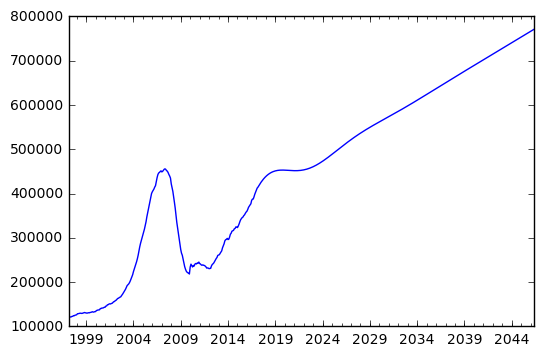

In [302]:
arimaModelResults.predict(start=10,end=600,typ='levels').plot()

In [303]:
aggregatedTimeSeries.loc[1:,'predictedRegion']=arimaModelResults.predict(start=1,end=249,typ='levels')

In [304]:
aggregatedTimeSeries.loc[:,'Error']=aggregatedTimeSeries.predictedRegion - aggregatedTimeSeries.Region

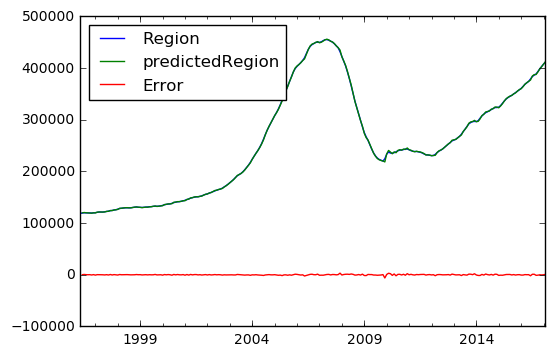

In [305]:
aggregatedTimeSeries[['Region','predictedRegion','Error']].plot()


In [475]:
#Check Error Range
chkerror=pd.DataFrame()
chkerror.loc[:,'predicted']=arimaModelResults.predict(typ='levels').values
chkerror.index=aggregatedTimeSeries.index[1:]
chkerror.ix[:,'actual']=aggregatedTimeSeries[['Region']].iloc[1:,:]
chkerror.loc[:,'error']=chkerror.actual - chkerror.predicted
chkerror.error.plot()

KeyError: "['Region'] not in index"

## Seasonal_Decompose

In [339]:
aggregatedTimeSeries=GetAggregatedSeries(118208)
aggregatedTimeSeries.index=pd.to_datetime(aggregatedTimeSeries.index)

In [342]:
seasonalModel=sm.tsa.seasonal_decompose(aggregatedTimeSeries[['Region']],model='additive')

In [394]:
help(sm.tsa.seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, freq=None)
    Parameters
    ----------
    x : array-like
        Time series
    model : str {"additive", "multiplicative"}
        Type of seasonal component. Abbreviations are accepted.
    filt : array-like
        The filter coefficients for filtering out the seasonal component.
        The default is a symmetric moving average.
    freq : int, optional
        Frequency of the series. Must be used if x is not a pandas
        object with a timeseries index.
    
    Returns
    -------
    results : obj
        A object with seasonal, trend, and resid attributes.
    
    Notes
    -----
    This is a naive decomposition. More sophisticated methods should
    be preferred.
    
    The additive model is Y[t] = T[t] + S[t] + e[t]
    
    The multiplicative model is Y[t] = T[t] * S[t] * e[t]
    
    The seasonal component is first removed by applying a con

In [386]:
laggedColumnsData=GenerateLagColumns(data=aggregatedTimeSeries[['Region']],lags=range(1,8)).iloc[:,1:]
laggedColumnsData.head(10)

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Region_1  Region_2  Region_3  Region_4  Region_5  Region_6  \
1996-05-01       NaN       NaN       NaN       NaN       NaN       NaN   
1996-06-01  118700.0       NaN       NaN       NaN       NaN       NaN   
1996-07-01  119600.0  118700.0       NaN       NaN       NaN       NaN   
1996-08-01  119900.0  119600.0  118700.0       NaN       NaN       NaN   
1996-09-01  119800.0  119900.0  119600.0  118700.0       NaN       NaN   
1996-10-01  119700.0  119800.0  119900.0  119600.0  118700.0       NaN   
1996-11-01  119500.0  119700.0  119800.0  119900.0  119600.0  118700.0   
1996-12-01  119600.0  119500.0  119700.0  119800.0  119900.0  119600.0   
1997-01-01  119700.0  119600.0  119500.0  119700.0  119800.0  119900.0   
1997-02-01  120300.0  119700.0  119600.0  119500.0  119700.0  119800.0   

            Region_7  
1996-05-01       NaN  
1996-06-01       NaN  
1996-07-01       NaN  
1996-08-01       NaN  
1996-09-01       NaN  
1996-10-01       NaN  
1996-11-01       NaN  
1996-12-01  118700.0  
1997-01-01  119600.0  
1997-02-01  119900.0

In [392]:
aggregatedTimeSeries['movavg']=laggedColumnsData.T.mean().T

In [375]:
aggregatedTimeSeries.loc[:,'trend']=seasonalModel.trend
aggregatedTimeSeries.loc[:,'seasonal']=seasonalModel.seasonal
aggregatedTimeSeries.loc[:,'error']=seasonalModel.resid
aggregatedTimeSeries.loc[:,'predicted']=seasonalModel.seasonal+seasonalModel.trend + seasonalModel.resid

In [393]:
# Issue - we expect the trend value to be equal to average/moving average of previous lagged values but trend not 
# equal to moving average
#Update :Abhijit found that the moving average doent match because abhijit is taking lag 7 values whereas trend is taking a"centered MA"
# details of how to calculate trend are here - https://onlinecourses.science.psu.edu/stat510/node/69
aggregatedTimeSeries.iloc[0:30,3:]

Region          State         movavg          trend  predicted  \
1996-05-01  118700.0  202507.977208            NaN            NaN        NaN   
1996-06-01  119600.0  202693.304843  118700.000000            NaN        NaN   
1996-07-01  119900.0  202894.017094  119150.000000            NaN        NaN   
1996-08-01  119800.0  203121.794872  119400.000000            NaN        NaN   
1996-09-01  119700.0  203431.054131  119500.000000            NaN        NaN   
1996-10-01  119500.0  203919.230769  119540.000000            NaN        NaN   
1996-11-01  119600.0  204683.475783  119533.333333  120154.166667   119600.0   
1996-12-01  119700.0  205873.931624  119542.857143  120362.500000   119700.0   
1997-01-01  120300.0  207515.811966  119685.714286  120566.666667   120300.0   
1997-02-01  121000.0  212894.829932  119785.714286  120820.833333   121000.0   
1997-03-01  121400.0  214206.802721  119942.857143  121141.666667   121400.0   
1997-04-01  121300.0  215301.360544  120171.428571  121529.166667   121300.0   
1997-05-01  121400.0  216572.244898  120400.000000  121975.000000   121400.0   
1997-06-01  121900.0  217881.768707  120671.428571  122466.666667   121900.0   
1997-07-01  122500.0  219339.047619  121000.000000  123004.166667   122500.0   
1997-08-01  123300.0  221397.435897  121400.000000  123583.333333   123300.0   
1997-09-01  123900.0  223318.893387  121828.571429  124191.666667   123900.0   
1997-10-01  124600.0  225294.466937  122242.857143  124829.166667   124600.0   
1997-11-01  125200.0  227435.357625  122700.000000  125500.000000   125200.0   
1997-12-01  125900.0  229737.112011  123257.142857  126162.500000   125900.0   
1998-01-01  127000.0  232366.261808  123900.000000  126775.000000   127000.0   
1998-02-01  128200.0  234502.406417  124628.571429  127333.333333   128200.0   
1998-03-01  128800.0  236754.545455  125442.857143  127866.666667   128800.0   
1998-04-01  129200.0  237675.495751  126228.571429  128395.833333   129200.0   
1998-05-01  129600.0  237877.616279  126985.714286  128900.000000   129600.0   
1998-06-01  129600.0  239933.575581  127700.000000  129341.666667   129600.0   
1998-07-01  129500.0  244232.352941  128328.571429  129679.166667   129500.0   
1998-08-01  129700.0  246395.053476  128842.857143  129904.166667   129700.0   
1998-09-01  130300.0  248276.871658  129228.571429  130066.666667   130300.0   
1998-10-01  130900.0  252592.052980  129528.571429  130208.333333   130900.0   

              seasonal        error  
1996-05-01  -88.752741          NaN  
1996-06-01   43.955592          NaN  
1996-07-01  174.163925          NaN  
1996-08-01  234.788925          NaN  
1996-09-01  357.968750          NaN  
1996-10-01  335.600329          NaN  
1996-11-01  267.497259  -821.663925  
1996-12-01  -59.794408  -602.705592  
1997-01-01 -389.377741   122.711075  
1997-02-01 -439.377741   618.544408  
1997-03-01 -255.211075   513.544408  
1997-04-01 -181.461075   -47.705592  
1997-05-01  -88.752741  -486.247259  
1997-06-01   43.955592  -610.622259  
1997-07-01  174.163925  -678.330592  
1997-08-01  234.788925  -518.122259  
1997-09-01  357.968750  -649.635417  
1997-10-01  335.600329  -564.766996  
1997-11-01  267.497259  -567.497259  
1997-12-01  -59.794408  -202.705592  
1998-01-01 -389.377741   614.377741  
1998-02-01 -439.377741  1306.044408  
1998-03-01 -255.211075  1188.544408  
1998-04-01 -181.461075   985.627741  
1998-05-01  -88.752741   788.752741  
1998-06-01   43.955592   214.377741  
1998-07-01  174.163925  -353.330592  
1998-08-01  234.788925  -438.955592  
1998-09-01  357.968750  -124.635417  
1998-10-01  335.600329   356.066338

In [ ]:
#Note : Important: Even though there is no predict method, the seasonal values will repeat every 12 months,
# Trend value is nothing but a 7 period moving average if its yearly data, or can be 4 for quaterly data(by default), 
#So when we want to predict in the fututre, we can use past seasonal components which repeat
#For trend, we should calculate moving averages for the next 12 months by usin the lag function(default is 7 in seasonal index)

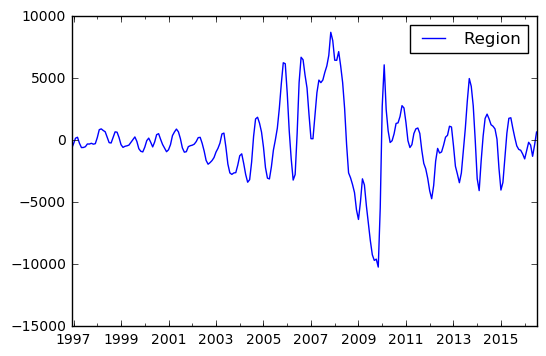

In [455]:
#Check error range - we can see error range was a lot smaller when using ARMA
(aggregatedTimeSeries[['Region']][7:-7] - seasonalModel.trend[7:-7]).plot()

In [458]:
# ARMA assignment
#Create a dataframe with city values - chnage p,q values
#Run predict function & compare the results or check error

In [468]:
aggregatedTimeSeries=GetAggregatedSeries(118208)
aggregatedTimeSeries=aggregatedTimeSeries[['City']]
aggregatedTimeSeries.index=pd.to_datetime(aggregatedTimeSeries.index)
aggregatedTimeSeries.head()

City
1996-05-01  202888.235294
1996-06-01  202725.000000
1996-07-01  202677.941176
1996-08-01  202895.588235
1996-09-01  203125.000000

In [462]:
import statsmodels.api as sm

In [520]:
arimaModel=sm.tsa.ARMA(aggregatedTimeSeries,order=(3,2))

In [521]:
arimaModelResults=arimaModel.fit()

/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


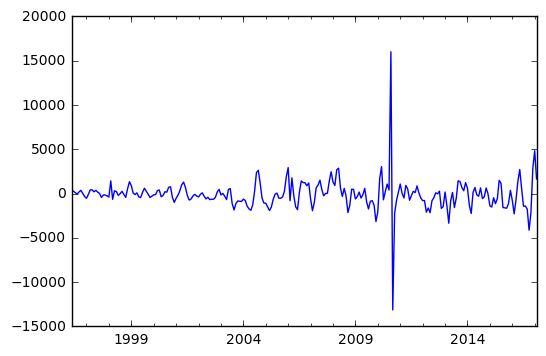

In [522]:
#Plot Error
(arimaModelResults.predict() - aggregatedTimeSeries.City[1:]).plot()

In [523]:
(arimaModelResults.predict() - aggregatedTimeSeries.City[1:]).describe()

count      249.000000
mean      -111.146651
std       1746.342826
min     -13132.276697
25%               NaN
50%               NaN
75%               NaN
max      16009.050420
dtype: float64

In [524]:
arimaModelResults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   City   No. Observations:                  250
Model:                     ARMA(3, 2)   Log Likelihood               -2227.585
Method:                       css-mle   S.D. of innovations           1750.139
Date:                Sat, 22 Apr 2017   AIC                           4469.170
Time:                        00:29:37   BIC                           4493.821
Sample:                    05-01-1996   HQIC                          4479.091
                         - 02-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.126e+05   1.17e+05      4.370      0.000      2.83e+05  7.43e+05
ar.L1.City     1.5175      0.103     14.668      0.000         1.315     1.720
ar.L2.City    -0.0879      0.205     -0.429      0.668        -0.490     0.314
ar.L3.City    -0.4305      0.103     -4.176      0.000        -0.633    -0.228
ma.L1.City     0.2856      0.122      2.346      0.020         0.047     0.524
ma.L2.City    -0.0657      0.077     -0.852      0.395        -0.217     0.086
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0180           -0.0192j            1.0182           -0.0030
AR.2            1.0180           +0.0192j            1.0182            0.0030
AR.3           -2.2403           -0.0000j            2.2403           -0.5000
MA.1           -2.2923           +0.0000j            2.2923            0.5000
MA.2            6.6376           +0.0000j            6.6376            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# ARIMA pointers
#always select q value smaller than p value
# If your model is becoming complex(if you are taking log values above 4), prefer BIC, if less complex model prefer AIC
# AIC and BIC are more important than llf